<a href="https://colab.research.google.com/github/aditya-167/TradingBot/blob/main/Copy_of_CS435.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pickle
import numpy as np
import pandas as pd
from pandas.core.window.expanding import Axis
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [3]:
training_object = open("/content/drive/MyDrive/CS435/datasets/training_set.pkl", "rb")
training_df = pickle.load(training_object)
stock_df = training_df[0] #taking the first table in the array as of now.

In [4]:
training_df

[          Open      High       Low     Close    Volume
 0     0.672106  0.679902  0.669265  0.671966  0.336899
 1     0.672106  0.674597  0.670546  0.672106  0.208023
 2     0.672106  0.678621  0.671827  0.676282  0.142405
 3     0.676338  0.677340  0.672384  0.673498  0.146400
 4     0.673442  0.676004  0.672997  0.675892  0.116960
 ...        ...       ...       ...       ...       ...
 2197  0.680849  0.683633  0.672997  0.674055  0.351048
 2198  0.674389  0.674890  0.671326  0.674055  0.143069
 2199  0.674110  0.676227  0.672440  0.676004  0.312048
 2200  0.675725  0.675837  0.668820  0.669321  0.279230
 2201  0.669293  0.671326  0.662973  0.664198  0.552933
 
 [2202 rows x 5 columns],
           Open      High       Low     Close    Volume
 0     0.188500  0.188806  0.182587  0.182791  0.297459
 1     0.182689  0.184830  0.181262  0.184626  0.171799
 2     0.184626  0.186869  0.183811  0.185442  0.201348
 3     0.185442  0.188498  0.185442  0.187685  0.164089
 4     0.187684  0.1

In [5]:
stock_df['Close_pct_change'] = stock_df['Close'].pct_change()

In [6]:
stock_df

,Open,High,Low,Close,Volume,Close_pct_change
0,0.672106,0.679902,0.669265,0.671966,0.336899,NaN
1,0.672106,0.674597,0.670546,0.672106,0.208023,0.000207
2,0.672106,0.678621,0.671827,0.676282,0.142405,0.006214
3,0.676338,0.677340,0.672384,0.673498,0.146400,-0.004117
4,0.673442,0.676004,0.672997,0.675892,0.116960,0.003555
...,...,...,...,...,...,...
2197,0.680849,0.683633,0.672997,0.674055,0.351048,-0.010141
2198,0.674389,0.674890,0.671326,0.674055,0.143069,0.000000
2199,0.674110,0.676227,0.672440,0.676004,0.312048,0.002892
2200,0.675725,0.675837,0.668820,0.669321,0.279230,-0.009885


In [7]:
stock_df = stock_df.dropna()

In [8]:
stock_df

,Open,High,Low,Close,Volume,Close_pct_change
1,0.672106,0.674597,0.670546,0.672106,0.208023,0.000207
2,0.672106,0.678621,0.671827,0.676282,0.142405,0.006214
3,0.676338,0.677340,0.672384,0.673498,0.146400,-0.004117
4,0.673442,0.676004,0.672997,0.675892,0.116960,0.003555
5,0.675892,0.676115,0.673609,0.674890,0.205266,-0.001483
...,...,...,...,...,...,...
2197,0.680849,0.683633,0.672997,0.674055,0.351048,-0.010141
2198,0.674389,0.674890,0.671326,0.674055,0.143069,0.000000
2199,0.674110,0.676227,0.672440,0.676004,0.312048,0.002892
2200,0.675725,0.675837,0.668820,0.669321,0.279230,-0.009885


In [9]:
stock_df['Close_pct_change'].describe()

count    2201.000000
mean        0.000013
std         0.006096
min        -0.039071
25%        -0.002539
50%         0.000147
75%         0.002671
max         0.051286
Name: Close_pct_change, dtype: float64

### Close percentage change categories

In [10]:
bin_labels = ["decrease", "no big change", "increase"]
stock_df['Close_pct_change_range'] = pd.qcut(stock_df['Close_pct_change'], q=3)
stock_df['Close_pct_change_category'] = pd.qcut(stock_df['Close_pct_change'], q=3,labels=bin_labels)
stock_df

<ipython-input-10-8fc8cac91a6a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df['Close_pct_change_range'] = pd.qcut(stock_df['Close_pct_change'], q=3)
<ipython-input-10-8fc8cac91a6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df['Close_pct_change_category'] = pd.qcut(stock_df['Close_pct_change'], q=3,labels=bin_labels)


,Open,High,Low,Close,Volume,Close_pct_change,Close_pct_change_range,Close_pct_change_category
1,0.672106,0.674597,0.670546,0.672106,0.208023,0.000207,"(-0.00142, 0.00162]",no big change
2,0.672106,0.678621,0.671827,0.676282,0.142405,0.006214,"(0.00162, 0.0513]",increase
3,0.676338,0.677340,0.672384,0.673498,0.146400,-0.004117,"(-0.040100000000000004, -0.00142]",decrease
4,0.673442,0.676004,0.672997,0.675892,0.116960,0.003555,"(0.00162, 0.0513]",increase
5,0.675892,0.676115,0.673609,0.674890,0.205266,-0.001483,"(-0.040100000000000004, -0.00142]",decrease
...,...,...,...,...,...,...,...,...
2197,0.680849,0.683633,0.672997,0.674055,0.351048,-0.010141,"(-0.040100000000000004, -0.00142]",decrease
2198,0.674389,0.674890,0.671326,0.674055,0.143069,0.000000,"(-0.00142, 0.00162]",no big change
2199,0.674110,0.676227,0.672440,0.676004,0.312048,0.002892,"(0.00162, 0.0513]",increase
2200,0.675725,0.675837,0.668820,0.669321,0.279230,-0.009885,"(-0.040100000000000004, -0.00142]",decrease


### Range of the each close percentage categories

In [11]:
print("Ranges for the categories \n"+str(stock_df['Close_pct_change_range'].value_counts().keys()[0])+"\n"+
str(stock_df['Close_pct_change_range'].value_counts().keys()[1])+"\n"+
str(stock_df['Close_pct_change_range'].value_counts().keys()[2]))

Ranges for the categories 
(-0.040100000000000004, -0.00142]
(0.00162, 0.0513]
(-0.00142, 0.00162]


In [12]:
def addTI(df,lag=5):
  short_w = [5,8,13,26,44,50,75,100,150]
  long_w = [12,19,26,44,75,100,125,200,300]
  data = df.copy()
  features = []
  for x,y in zip(short_w,long_w):
    data["SMA_diff_"+str(x)+"_"+str(y)] = data.Close.rolling(x).mean() - data.Close.rolling(y).mean()
    features.append("SMA_diff_"+str(x)+"_"+str(y))
  for x in (short_w+long_w):
    data["Boll_"+str(x)] = (data.Close - data.Close.rolling(x).mean())/data.Close.rolling(x).std() 
    features.append("Boll_"+str(x))
    data["Min_"+str(x)] = data.Close.rolling(x).min()/data.Close -1 
    features.append("Min_"+str(x))
    data["Max_"+str(x)] =  data.Close.rolling(x).max()/data.Close -1  
    features.append("Max_"+str(x))
    data["Mom_"+str(x)] = data.Close_pct_change.rolling(x).mean()
    features.append("Mom_"+str(x))
    data["Vol_"+str(x)] = data.Close_pct_change.rolling(x).std()
    features.append("Vol_"+str(x))
  
  for f in features:
    col = "{}_lag_{}".format(f,lag)
    data[col] = data[f].shift(lag)

  data.dropna(inplace=True)
  return data

In [13]:
stock_df = addTI(stock_df,lag=21)

<ipython-input-12-3396db1f1ea5>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[col] = data[f].shift(lag)
<ipython-input-12-3396db1f1ea5>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[col] = data[f].shift(lag)
<ipython-input-12-3396db1f1ea5>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.cop

<Axes: title={'center': 'Feature Plot'}>

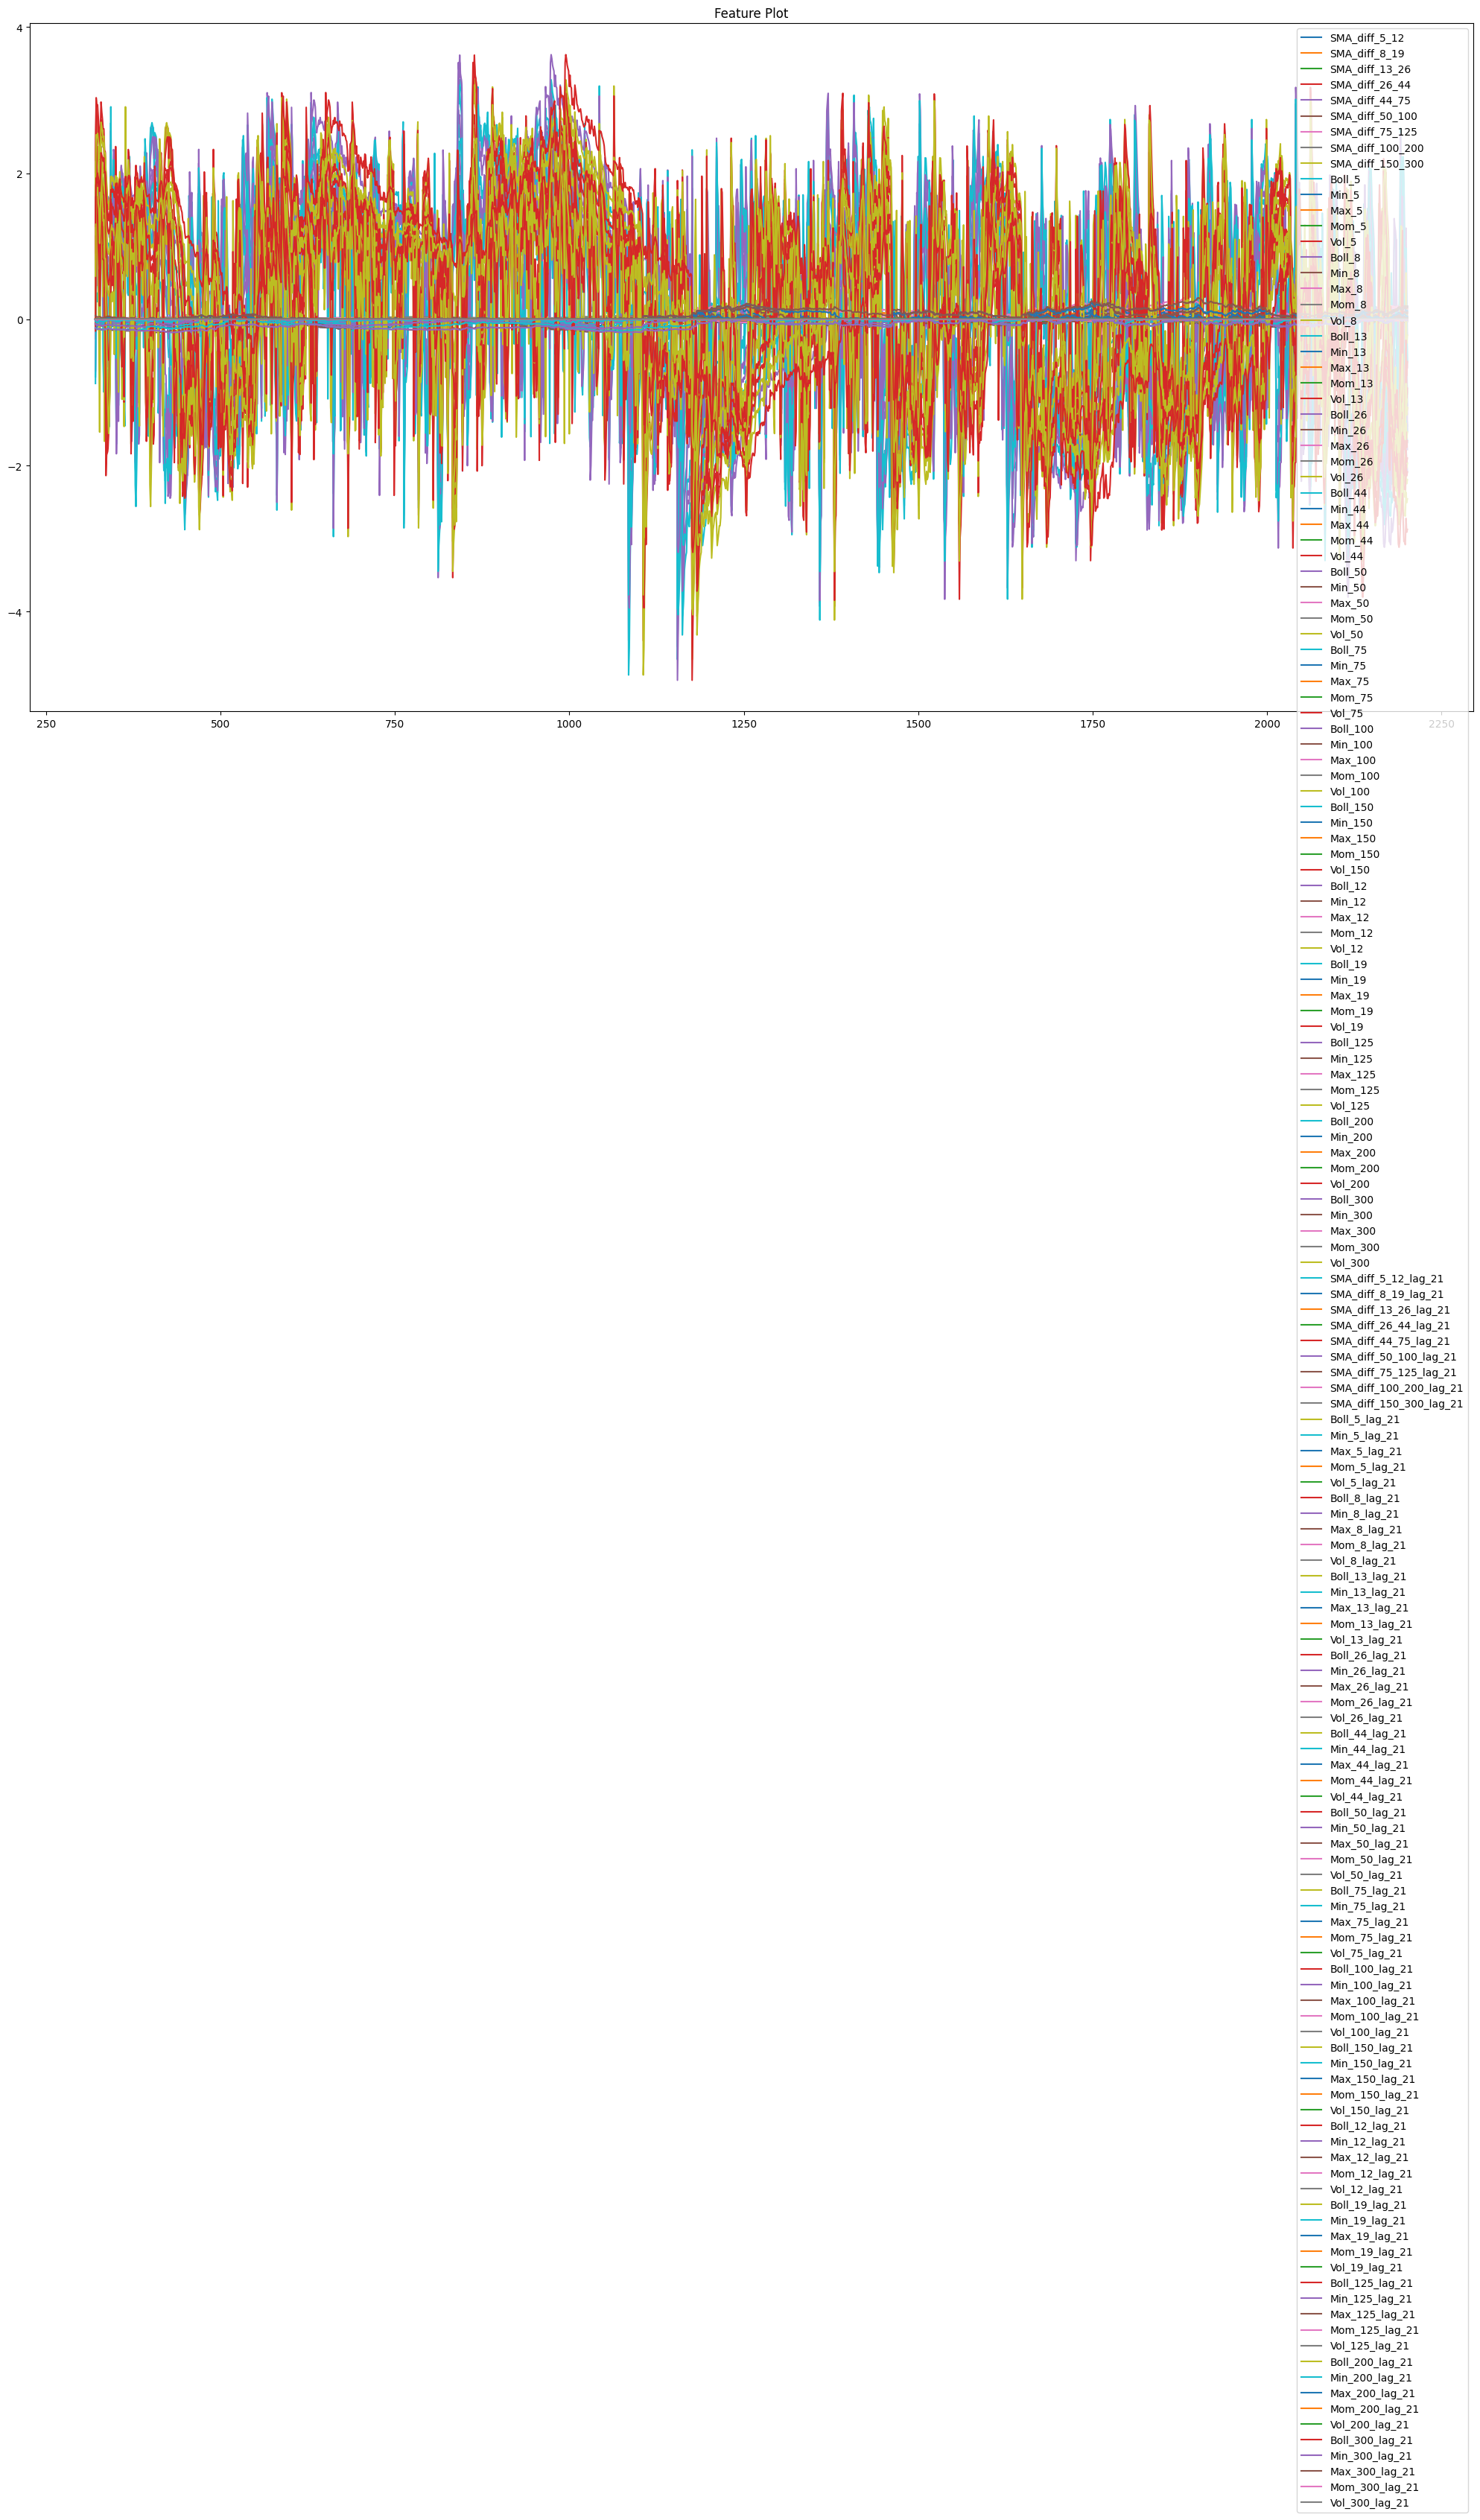

In [14]:
stock_df[stock_df.columns[8:]].plot(title='Feature Plot', figsize=(25, 12))

# Task 3 :Trading Predictive Models

In [15]:
stock_df

,Open,High,Low,Close,Volume,Close_pct_change,Close_pct_change_range,Close_pct_change_category,SMA_diff_5_12,SMA_diff_8_19,...,Boll_200_lag_21,Min_200_lag_21,Max_200_lag_21,Mom_200_lag_21,Vol_200_lag_21,Boll_300_lag_21,Min_300_lag_21,Max_300_lag_21,Mom_300_lag_21,Vol_300_lag_21
321,0.718605,0.720388,0.717436,0.720388,0.264081,0.002325,"(0.00162, 0.0513]",increase,-0.006044,-0.003734,...,1.859036,-0.115243,0.004071,0.000167,0.006498,1.322783,-0.115243,0.052768,0.000212,0.006739
322,0.725400,0.733586,0.723247,0.726903,0.242457,0.009045,"(0.00162, 0.0513]",increase,-0.003956,-0.004200,...,2.527118,-0.129353,0.000000,0.000217,0.006583,1.935771,-0.129353,0.035978,0.000265,0.006802
323,0.727683,0.730412,0.726959,0.727293,0.117235,0.000536,"(-0.00142, 0.00162]",no big change,-0.001710,-0.004125,...,2.489885,-0.129554,0.000000,0.000247,0.006568,1.925488,-0.129554,0.035739,0.000246,0.006793
324,0.727432,0.728685,0.726680,0.726847,0.084946,-0.000613,"(-0.00142, 0.00162]",no big change,0.000633,-0.003800,...,2.545311,-0.131694,0.000000,0.000270,0.006568,2.001277,-0.131694,0.033193,0.000267,0.006790
325,0.726569,0.728267,0.726569,0.727906,0.097322,0.001456,"(-0.00142, 0.00162]",no big change,0.002563,-0.002985,...,2.448052,-0.130692,0.001154,0.000278,0.006565,1.936595,-0.130692,0.034385,0.000252,0.006788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,0.680849,0.683633,0.672997,0.674055,0.351048,-0.010141,"(-0.040100000000000004, -0.00142]",decrease,0.008115,0.008115,...,-2.675811,0.000000,0.182070,-0.000468,0.007421,-3.046730,0.000000,0.182070,-0.000250,0.007859
2198,0.674389,0.674890,0.671326,0.674055,0.143069,0.000000,"(-0.00142, 0.00162]",no big change,0.006579,0.008770,...,-2.691583,0.000000,0.186194,-0.000489,0.007423,-3.082454,0.000000,0.186194,-0.000251,0.007860
2199,0.674110,0.676227,0.672440,0.676004,0.312048,0.002892,"(0.00162, 0.0513]",increase,0.005242,0.008034,...,-2.365239,-0.012604,0.171244,-0.000617,0.006954,-2.722687,-0.012604,0.171244,-0.000200,0.007894
2200,0.675725,0.675837,0.668820,0.669321,0.279230,-0.009885,"(-0.040100000000000004, -0.00142]",decrease,0.002098,0.007063,...,-2.509141,-0.003561,0.181970,-0.000635,0.006971,-2.911889,-0.003561,0.181970,-0.000192,0.007884


In [16]:
stock_df.dropna(inplace=True) 

In [17]:
stock_df

,Open,High,Low,Close,Volume,Close_pct_change,Close_pct_change_range,Close_pct_change_category,SMA_diff_5_12,SMA_diff_8_19,...,Boll_200_lag_21,Min_200_lag_21,Max_200_lag_21,Mom_200_lag_21,Vol_200_lag_21,Boll_300_lag_21,Min_300_lag_21,Max_300_lag_21,Mom_300_lag_21,Vol_300_lag_21
321,0.718605,0.720388,0.717436,0.720388,0.264081,0.002325,"(0.00162, 0.0513]",increase,-0.006044,-0.003734,...,1.859036,-0.115243,0.004071,0.000167,0.006498,1.322783,-0.115243,0.052768,0.000212,0.006739
322,0.725400,0.733586,0.723247,0.726903,0.242457,0.009045,"(0.00162, 0.0513]",increase,-0.003956,-0.004200,...,2.527118,-0.129353,0.000000,0.000217,0.006583,1.935771,-0.129353,0.035978,0.000265,0.006802
323,0.727683,0.730412,0.726959,0.727293,0.117235,0.000536,"(-0.00142, 0.00162]",no big change,-0.001710,-0.004125,...,2.489885,-0.129554,0.000000,0.000247,0.006568,1.925488,-0.129554,0.035739,0.000246,0.006793
324,0.727432,0.728685,0.726680,0.726847,0.084946,-0.000613,"(-0.00142, 0.00162]",no big change,0.000633,-0.003800,...,2.545311,-0.131694,0.000000,0.000270,0.006568,2.001277,-0.131694,0.033193,0.000267,0.006790
325,0.726569,0.728267,0.726569,0.727906,0.097322,0.001456,"(-0.00142, 0.00162]",no big change,0.002563,-0.002985,...,2.448052,-0.130692,0.001154,0.000278,0.006565,1.936595,-0.130692,0.034385,0.000252,0.006788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,0.680849,0.683633,0.672997,0.674055,0.351048,-0.010141,"(-0.040100000000000004, -0.00142]",decrease,0.008115,0.008115,...,-2.675811,0.000000,0.182070,-0.000468,0.007421,-3.046730,0.000000,0.182070,-0.000250,0.007859
2198,0.674389,0.674890,0.671326,0.674055,0.143069,0.000000,"(-0.00142, 0.00162]",no big change,0.006579,0.008770,...,-2.691583,0.000000,0.186194,-0.000489,0.007423,-3.082454,0.000000,0.186194,-0.000251,0.007860
2199,0.674110,0.676227,0.672440,0.676004,0.312048,0.002892,"(0.00162, 0.0513]",increase,0.005242,0.008034,...,-2.365239,-0.012604,0.171244,-0.000617,0.006954,-2.722687,-0.012604,0.171244,-0.000200,0.007894
2200,0.675725,0.675837,0.668820,0.669321,0.279230,-0.009885,"(-0.040100000000000004, -0.00142]",decrease,0.002098,0.007063,...,-2.509141,-0.003561,0.181970,-0.000635,0.006971,-2.911889,-0.003561,0.181970,-0.000192,0.007884


In [18]:
stock_df.Close_pct_change_category = stock_df.Close_pct_change_category.apply(lambda x:1 if(x== "increase")else 0)

In [19]:
stock_df.drop(columns="Close_pct_change_range",inplace = True)  # droping the  close_pct_change_Range colums as we dont need this need more to calcautet the big increase, decrease

In [20]:
stock_df

,Open,High,Low,Close,Volume,Close_pct_change,Close_pct_change_category,SMA_diff_5_12,SMA_diff_8_19,SMA_diff_13_26,...,Boll_200_lag_21,Min_200_lag_21,Max_200_lag_21,Mom_200_lag_21,Vol_200_lag_21,Boll_300_lag_21,Min_300_lag_21,Max_300_lag_21,Mom_300_lag_21,Vol_300_lag_21
321,0.718605,0.720388,0.717436,0.720388,0.264081,0.002325,1,-0.006044,-0.003734,0.002909,...,1.859036,-0.115243,0.004071,0.000167,0.006498,1.322783,-0.115243,0.052768,0.000212,0.006739
322,0.725400,0.733586,0.723247,0.726903,0.242457,0.009045,1,-0.003956,-0.004200,0.001975,...,2.527118,-0.129353,0.000000,0.000217,0.006583,1.935771,-0.129353,0.035978,0.000265,0.006802
323,0.727683,0.730412,0.726959,0.727293,0.117235,0.000536,0,-0.001710,-0.004125,0.000990,...,2.489885,-0.129554,0.000000,0.000247,0.006568,1.925488,-0.129554,0.035739,0.000246,0.006793
324,0.727432,0.728685,0.726680,0.726847,0.084946,-0.000613,0,0.000633,-0.003800,0.000073,...,2.545311,-0.131694,0.000000,0.000270,0.006568,2.001277,-0.131694,0.033193,0.000267,0.006790
325,0.726569,0.728267,0.726569,0.727906,0.097322,0.001456,0,0.002563,-0.002985,-0.000966,...,2.448052,-0.130692,0.001154,0.000278,0.006565,1.936595,-0.130692,0.034385,0.000252,0.006788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,0.680849,0.683633,0.672997,0.674055,0.351048,-0.010141,0,0.008115,0.008115,0.003147,...,-2.675811,0.000000,0.182070,-0.000468,0.007421,-3.046730,0.000000,0.182070,-0.000250,0.007859
2198,0.674389,0.674890,0.671326,0.674055,0.143069,0.000000,0,0.006579,0.008770,0.003880,...,-2.691583,0.000000,0.186194,-0.000489,0.007423,-3.082454,0.000000,0.186194,-0.000251,0.007860
2199,0.674110,0.676227,0.672440,0.676004,0.312048,0.002892,1,0.005242,0.008034,0.005169,...,-2.365239,-0.012604,0.171244,-0.000617,0.006954,-2.722687,-0.012604,0.171244,-0.000200,0.007894
2200,0.675725,0.675837,0.668820,0.669321,0.279230,-0.009885,0,0.002098,0.007063,0.006105,...,-2.509141,-0.003561,0.181970,-0.000635,0.006971,-2.911889,-0.003561,0.181970,-0.000192,0.007884


In [21]:
Y = stock_df.Close_pct_change_category.to_frame() # Y is labes for big change or small changes

In [22]:
stock_df.drop(columns="Close_pct_change_category",inplace = True)


In [23]:
stock_df

,Open,High,Low,Close,Volume,Close_pct_change,SMA_diff_5_12,SMA_diff_8_19,SMA_diff_13_26,SMA_diff_26_44,...,Boll_200_lag_21,Min_200_lag_21,Max_200_lag_21,Mom_200_lag_21,Vol_200_lag_21,Boll_300_lag_21,Min_300_lag_21,Max_300_lag_21,Mom_300_lag_21,Vol_300_lag_21
321,0.718605,0.720388,0.717436,0.720388,0.264081,0.002325,-0.006044,-0.003734,0.002909,0.007662,...,1.859036,-0.115243,0.004071,0.000167,0.006498,1.322783,-0.115243,0.052768,0.000212,0.006739
322,0.725400,0.733586,0.723247,0.726903,0.242457,0.009045,-0.003956,-0.004200,0.001975,0.007525,...,2.527118,-0.129353,0.000000,0.000217,0.006583,1.935771,-0.129353,0.035978,0.000265,0.006802
323,0.727683,0.730412,0.726959,0.727293,0.117235,0.000536,-0.001710,-0.004125,0.000990,0.007499,...,2.489885,-0.129554,0.000000,0.000247,0.006568,1.925488,-0.129554,0.035739,0.000246,0.006793
324,0.727432,0.728685,0.726680,0.726847,0.084946,-0.000613,0.000633,-0.003800,0.000073,0.007415,...,2.545311,-0.131694,0.000000,0.000270,0.006568,2.001277,-0.131694,0.033193,0.000267,0.006790
325,0.726569,0.728267,0.726569,0.727906,0.097322,0.001456,0.002563,-0.002985,-0.000966,0.007383,...,2.448052,-0.130692,0.001154,0.000278,0.006565,1.936595,-0.130692,0.034385,0.000252,0.006788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,0.680849,0.683633,0.672997,0.674055,0.351048,-0.010141,0.008115,0.008115,0.003147,-0.008310,...,-2.675811,0.000000,0.182070,-0.000468,0.007421,-3.046730,0.000000,0.182070,-0.000250,0.007859
2198,0.674389,0.674890,0.671326,0.674055,0.143069,0.000000,0.006579,0.008770,0.003880,-0.007460,...,-2.691583,0.000000,0.186194,-0.000489,0.007423,-3.082454,0.000000,0.186194,-0.000251,0.007860
2199,0.674110,0.676227,0.672440,0.676004,0.312048,0.002892,0.005242,0.008034,0.005169,-0.006823,...,-2.365239,-0.012604,0.171244,-0.000617,0.006954,-2.722687,-0.012604,0.171244,-0.000200,0.007894
2200,0.675725,0.675837,0.668820,0.669321,0.279230,-0.009885,0.002098,0.007063,0.006105,-0.005840,...,-2.509141,-0.003561,0.181970,-0.000635,0.006971,-2.911889,-0.003561,0.181970,-0.000192,0.007884


In [24]:
X= stock_df.copy() # X = are features  from all the indicator  

In [25]:
X.describe()

,Open,High,Low,Close,Volume,Close_pct_change,SMA_diff_5_12,SMA_diff_8_19,SMA_diff_13_26,SMA_diff_26_44,...,Boll_200_lag_21,Min_200_lag_21,Max_200_lag_21,Mom_200_lag_21,Vol_200_lag_21,Boll_300_lag_21,Min_300_lag_21,Max_300_lag_21,Mom_300_lag_21,Vol_300_lag_21
count,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,...,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000
mean,0.817202,0.819965,0.814281,0.817101,0.264718,-0.000024,-0.000091,-0.000163,-0.000204,-0.000234,...,0.200333,-0.065653,0.060193,0.000056,0.005636,0.215589,-0.082385,0.076728,0.000052,0.005661
std,0.077100,0.077039,0.077181,0.077123,0.166878,0.005998,0.005662,0.007085,0.007111,0.007518,...,1.510250,0.042175,0.058184,0.000417,0.001698,1.494552,0.048990,0.069749,0.000330,0.001558
min,0.654341,0.657125,0.652893,0.654397,0.000000,-0.039071,-0.033518,-0.034185,-0.031128,-0.024970,...,-3.267250,-0.167680,0.000000,-0.000834,0.002775,-3.118503,-0.179422,0.000000,-0.000715,0.002966
25%,0.748343,0.751629,0.745280,0.748343,0.149533,-0.002462,-0.002941,-0.003521,-0.003666,-0.004367,...,-1.063997,-0.094762,0.006963,-0.000270,0.003945,-1.029066,-0.127201,0.008832,-0.000224,0.004169
50%,0.821741,0.823189,0.819235,0.821100,0.216741,0.000167,0.000639,0.000765,0.001028,0.000949,...,0.320555,-0.062852,0.042400,0.000049,0.006018,0.205161,-0.077493,0.061117,0.000063,0.005893
75%,0.870051,0.872974,0.867294,0.870190,0.330952,0.002659,0.003326,0.004146,0.004130,0.004437,...,1.512695,-0.032226,0.104896,0.000394,0.006924,1.512046,-0.045426,0.134139,0.000336,0.007157
max,0.998719,1.000000,0.997132,0.998663,1.449793,0.038453,0.018996,0.018113,0.016433,0.016388,...,3.279834,0.000000,0.225528,0.000926,0.008368,3.623024,0.000000,0.295558,0.000630,0.008263


In [26]:
X.shape # this will say you how many features we have 

(1881, 164)

In [27]:
Y.shape   # Y is all  big increase , incease and no increase


(1881, 1)

In [28]:

# Get the percentage to split the data( 70% data for training set, and 30% data for test set)

percentage_split =0.7;
row= int(stock_df.shape[0]*percentage_split)

#create the train data set
X_train = X[:row]

Y_train = Y[:row]

#create the test data set 
X_test = X[row:]
Y_test = Y[row:]



### **Testing code to check the X and Y**

Testing code for X and Y -- End

**First Data Model Predication -SVC(scalar vector classification) - MODEL-1**

In [29]:
# #Hyperparameter tuning for SVM
# import numpy as np
# from sklearn.svm import SVC
# from sklearn.model_selection import ParameterSampler, train_test_split

In [30]:
# param_grid = {'C': np.logspace(-3, 3, 7), 'kernel': ['linear', 'rbf'], 'gamma': np.logspace(-3, 3, 7)}

# # Generate 100 different parameter combinations
# param_sampler = ParameterSampler(param_grid, n_iter=100, random_state=42)
# param_combos = list(param_sampler)

# # Loop through the parameter combinations and train SVM models
# for i, params in enumerate(param_combos):
#     svm = SVC(**params)
#     svm.fit(X_train, Y_train)
#     accuracy = svm.score(X_test, Y_test)
#     print("Parameter Combo", i + 1)
#     print("Parameters:", params)
#     print("Test Set Accuracy:", accuracy)
#     print("------------")

# #77% : 'kernel': 'linear', 'gamma': 1000.0, 'C': 1000.0

In [31]:
# imported the libary for the machine learning model which is  support Vector Classifier (SVC)

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

params = {'C': [500, 1000, 2000,1000], 'kernel': ['linear', 'rbf', 'sigmoid'], 'gamma': [500, 1000, 2000,1000]}

# Now creating model
model = SVC()
grid_search = GridSearchCV(model, params, cv=5)

model.fit(X_train,Y_train)  #training the model on X_train and Y_Train


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [32]:
#X_train.describe().iloc[1,:].plot()

In [33]:
model.score(X_train,Y_train) # checking the score the model on train data set

0.8457446808510638

In [34]:
model.score(X_test,Y_test)# checking the score the model on test data set

0.7769911504424779

In [35]:
#stock_df['Prediction_SVC']

In [36]:
X_test

,Open,High,Low,Close,Volume,Close_pct_change,SMA_diff_5_12,SMA_diff_8_19,SMA_diff_13_26,SMA_diff_26_44,...,Boll_200_lag_21,Min_200_lag_21,Max_200_lag_21,Mom_200_lag_21,Vol_200_lag_21,Boll_300_lag_21,Min_300_lag_21,Max_300_lag_21,Mom_300_lag_21,Vol_300_lag_21
1637,0.844072,0.846077,0.840174,0.843571,0.357736,-0.000890,-0.010507,-0.017233,-0.014580,-0.001153,...,1.423050,-0.080697,0.026734,0.000035,0.006643,1.281205,-0.080697,0.026734,0.000106,0.006300
1638,0.843738,0.845074,0.836721,0.838169,0.234648,-0.006403,-0.011877,-0.017322,-0.016718,-0.002586,...,1.457720,-0.081523,0.025811,0.000016,0.006636,1.310010,-0.081523,0.025811,0.000121,0.006297
1639,0.837835,0.839505,0.833658,0.837222,0.231368,-0.001129,-0.014378,-0.017741,-0.018949,-0.003865,...,1.529134,-0.083313,0.023813,0.000041,0.006633,1.379526,-0.083313,0.023813,0.000160,0.006271
1640,0.837222,0.844295,0.837145,0.844155,0.307166,0.008281,-0.013478,-0.018342,-0.020195,-0.005249,...,1.517016,-0.083029,0.024129,0.000025,0.006630,1.357172,-0.083029,0.024129,0.000172,0.006267
1641,0.844406,0.847692,0.841789,0.842011,0.538745,-0.002540,-0.012126,-0.018915,-0.019757,-0.006528,...,1.327438,-0.078353,0.029351,0.000002,0.006640,1.144832,-0.078353,0.029351,0.000134,0.006264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,0.680849,0.683633,0.672997,0.674055,0.351048,-0.010141,0.008115,0.008115,0.003147,-0.008310,...,-2.675811,0.000000,0.182070,-0.000468,0.007421,-3.046730,0.000000,0.182070,-0.000250,0.007859
2198,0.674389,0.674890,0.671326,0.674055,0.143069,0.000000,0.006579,0.008770,0.003880,-0.007460,...,-2.691583,0.000000,0.186194,-0.000489,0.007423,-3.082454,0.000000,0.186194,-0.000251,0.007860
2199,0.674110,0.676227,0.672440,0.676004,0.312048,0.002892,0.005242,0.008034,0.005169,-0.006823,...,-2.365239,-0.012604,0.171244,-0.000617,0.006954,-2.722687,-0.012604,0.171244,-0.000200,0.007894
2200,0.675725,0.675837,0.668820,0.669321,0.279230,-0.009885,0.002098,0.007063,0.006105,-0.005840,...,-2.509141,-0.003561,0.181970,-0.000635,0.006971,-2.911889,-0.003561,0.181970,-0.000192,0.007884


In [37]:
#Now we make and show the models predictins

#showing the prediction
def predictDF(df, model, name):
  data = pd.DataFrame()
  data[name] = model.predict(df)
  return data
  


In [38]:
svc_pred = predictDF(X_test, model, "Prediction_SVC")

In [39]:
svc_pred

,Prediction_SVC
0,0
1,0
2,0
3,1
4,0
...,...
560,0
561,0
562,0
563,0


In [40]:
X_test

,Open,High,Low,Close,Volume,Close_pct_change,SMA_diff_5_12,SMA_diff_8_19,SMA_diff_13_26,SMA_diff_26_44,...,Boll_200_lag_21,Min_200_lag_21,Max_200_lag_21,Mom_200_lag_21,Vol_200_lag_21,Boll_300_lag_21,Min_300_lag_21,Max_300_lag_21,Mom_300_lag_21,Vol_300_lag_21
1637,0.844072,0.846077,0.840174,0.843571,0.357736,-0.000890,-0.010507,-0.017233,-0.014580,-0.001153,...,1.423050,-0.080697,0.026734,0.000035,0.006643,1.281205,-0.080697,0.026734,0.000106,0.006300
1638,0.843738,0.845074,0.836721,0.838169,0.234648,-0.006403,-0.011877,-0.017322,-0.016718,-0.002586,...,1.457720,-0.081523,0.025811,0.000016,0.006636,1.310010,-0.081523,0.025811,0.000121,0.006297
1639,0.837835,0.839505,0.833658,0.837222,0.231368,-0.001129,-0.014378,-0.017741,-0.018949,-0.003865,...,1.529134,-0.083313,0.023813,0.000041,0.006633,1.379526,-0.083313,0.023813,0.000160,0.006271
1640,0.837222,0.844295,0.837145,0.844155,0.307166,0.008281,-0.013478,-0.018342,-0.020195,-0.005249,...,1.517016,-0.083029,0.024129,0.000025,0.006630,1.357172,-0.083029,0.024129,0.000172,0.006267
1641,0.844406,0.847692,0.841789,0.842011,0.538745,-0.002540,-0.012126,-0.018915,-0.019757,-0.006528,...,1.327438,-0.078353,0.029351,0.000002,0.006640,1.144832,-0.078353,0.029351,0.000134,0.006264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,0.680849,0.683633,0.672997,0.674055,0.351048,-0.010141,0.008115,0.008115,0.003147,-0.008310,...,-2.675811,0.000000,0.182070,-0.000468,0.007421,-3.046730,0.000000,0.182070,-0.000250,0.007859
2198,0.674389,0.674890,0.671326,0.674055,0.143069,0.000000,0.006579,0.008770,0.003880,-0.007460,...,-2.691583,0.000000,0.186194,-0.000489,0.007423,-3.082454,0.000000,0.186194,-0.000251,0.007860
2199,0.674110,0.676227,0.672440,0.676004,0.312048,0.002892,0.005242,0.008034,0.005169,-0.006823,...,-2.365239,-0.012604,0.171244,-0.000617,0.006954,-2.722687,-0.012604,0.171244,-0.000200,0.007894
2200,0.675725,0.675837,0.668820,0.669321,0.279230,-0.009885,0.002098,0.007063,0.006105,-0.005840,...,-2.509141,-0.003561,0.181970,-0.000635,0.006971,-2.911889,-0.003561,0.181970,-0.000192,0.007884


In [90]:
def graphReturns(df, data, name):
  from pandas.io.formats.style import plt
  from ast import Return
  stock_df = df.copy()
  dat = data.copy()
  stock_df = pd.concat([stock_df,dat],axis=1,ignore_index=True,sort=False)
  print(stock_df)
  stock_df['Return'] =stock_df['Close'].pct_change(1)
  stock_df['Strat_Return'] = stock_df[name].shift(1)*stock_df['Return']
  stock_df['Strat_Return']  # this will shows the stratergy returns from SVC

  # calculate the cumlative returns
  stock_df['Cummulative_Return'] = stock_df['Return'].cumsum()
  # strategy cummlative return
  stock_df['Cummulative_Strat'] = stock_df['Strat_Return'].cumsum()
  stock_df['Cummulative_Strat']

  # Grpah to check our first stratergy
  plt.figure(figsize=(16,8))
  plt.title('Returns')
  plt.plot(stock_df['Cummulative_Return'],color = 'orange',label = 'Stock return')
  plt.plot(stock_df['Cummulative_Strat'],color = 'Red',label = 'Stratergy return')
  plt.xticks(rotation =45)
  plt.legend()
  plt.show()


In [91]:
graphReturns(X_test, svc_pred,"Prediction_SVC")

           0         1         2         3         4         5         6    \
1637  0.844072  0.846077  0.840174  0.843571  0.357736 -0.000890 -0.010507   
1638  0.843738  0.845074  0.836721  0.838169  0.234648 -0.006403 -0.011877   
1639  0.837835  0.839505  0.833658  0.837222  0.231368 -0.001129 -0.014378   
1640  0.837222  0.844295  0.837145  0.844155  0.307166  0.008281 -0.013478   
1641  0.844406  0.847692  0.841789  0.842011  0.538745 -0.002540 -0.012126   
...        ...       ...       ...       ...       ...       ...       ...   
560        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
561        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
562        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
563        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
564        NaN       NaN       NaN       NaN       NaN       NaN       NaN   

           7         8         9    ...       155       156    

KeyError: ignored

**Second Data Model Predication -(Random Forest_Regression )  MODEL-2**

In [41]:
#creating a second model 
from sklearn.ensemble import RandomForestClassifier
model_RFR = RandomForestClassifier()
model_RFR.fit(X_train,Y_train)





<ipython-input-41-d9aa80432684>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RFR.fit(X_train,Y_train)


RandomForestClassifier()

In [42]:
model_RFR.score(X_train,Y_train) # Random

1.0

In [43]:
model_RFR.score(X_test,Y_test)

0.9982300884955753

In [44]:
#Now we make and show the models predictins
#stock_df['Prediction_RFR'] = model.predict(X)
rfr_pred = predictDF(X_test, model_RFR, "Prediction_RFR")

In [46]:
rfr_pred.sum()

Prediction_RFR    214
dtype: int64

In [ ]:
sum(stock_df['Prediction_RFR'])

250

### **Third Model -- Logistic Regression MODEL- 3**


In [48]:
#creating a second model 
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()
model_LR.fit(X_train,Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
model_LR.score(X_train,Y_train) # logisticRegresssion  on train data


0.8275075987841946

In [50]:
model_LR.score(X_test,Y_test) # logistic Regression on test data

0.7858407079646018

In [51]:
lr_pred = predictDF(X_test, model_LR, "Prediction_LR")

In [53]:
sum(lr_pred['Prediction_LR'])

228

### **Forth model for predcition which is DescionTreeRegressor MODEL-4**

In [54]:
#creating the froth model for prediction
from sklearn.tree import DecisionTreeClassifier
model_DTR = DecisionTreeClassifier()
model_DTR.fit(X_train,Y_train)



DecisionTreeClassifier()

In [55]:
model_DTR.score(X_train,Y_train) # logisticRegresssion  on train data

1.0

In [56]:
model_DTR.score(X_test,Y_test) # logisticRegresssion  on train data

0.9982300884955753

In [57]:
dtr_pred = predictDF(X_test, model_DTR, "Prediction_DTR")

In [58]:
sum(dtr_pred['Prediction_DTR'])

214

### **fith model for Prediction which is DNN MODEL-5**

In [59]:
from pandas.core.algorithms import mode
#creating the fifth model for prediction

from sklearn.neural_network import MLPClassifier
model_DNN = MLPClassifier()
model_DNN= MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

model_DNN.fit(X_train,Y_train)



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [60]:
model_DNN.score(X_train,Y_train)#DNN ON Train data


0.8487841945288754

In [61]:
model_DNN.score(X_test,Y_test) # DNN on the test data

0.8035398230088495

In [62]:
dnn_pred = predictDF(X_test, model_DNN, "Prediction_DNN")
sum(dnn_pred['Prediction_DNN'])

214

### **SIX model for predicition  K-NNN  MODEL-6**


In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [64]:
knn.score(X_train,Y_train)

0.8054711246200608

In [65]:
knn.score(X_test,Y_test)

0.7150442477876107

In [67]:
knn_pred = predictDF(X_test, knn, "Prediction_KNN")
sum(knn_pred['Prediction_KNN'])

156

### **Seventh Modelf ro predicition GaussianNB MODEL-7**


In [68]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB

# Generate sample data for demonstration purposes
# Create a Gaussian Naive Bayes classifier object
classifier = GaussianNB()

# Fit the classifier to the sample data
classifier.fit(X_train, Y_train)



/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [69]:
classifier.score(X_train,Y_train)

0.7173252279635258

In [70]:
classifier.score(X_test,Y_test)

0.6884955752212389

In [71]:
class_pred = predictDF(X_test, classifier, "Prediction_Classifier")
sum(class_pred['Prediction_Classifier'])

323

### **Eight Model for predicition XGBOOST MODEL-8**

In [72]:
import numpy as np
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Generate sample data for demonstration purposes
# Split the data into training and test sets


# Create an XGBoost classifier object
classifier_XGB = XGBClassifier()
classifier_XGB.fit(X_train, Y_train)

# Fit the classifier to the train

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [73]:
classifier_XGB.score(X_train,Y_train)

1.0

In [74]:
classifier_XGB.score(X_test,Y_test)

0.9982300884955753

In [75]:
XGB_pred = predictDF(X_test, classifier_XGB, "Prediction_XGB")
sum(XGB_pred['Prediction_XGB'])

214

### **Nineth Model fro predicition ADABoostClassifier -9**

In [76]:
from sklearn.ensemble import AdaBoostClassifier
clf_ADA = AdaBoostClassifier(n_estimators=100, random_state=0) 
clf_ADA.fit(X_train, Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(n_estimators=100, random_state=0)

In [77]:
clf_ADA.score(X_train,Y_train)

1.0

In [78]:
clf_ADA.score(X_test,Y_test)

0.9982300884955753

In [79]:
ADA_pred = predictDF(X_test, clf_ADA, "Prediction_ADA")
sum(ADA_pred['Prediction_ADA'])

214

### **Tenth Model for predicition  MODEL-10**

In [80]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Train the Gradient Boosting model
model_GD = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0)
model_GD.fit(X_train, Y_train)

# Evaluate the model on the test set



/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(max_depth=1, random_state=0)

In [81]:
model_GD.score(X_train,Y_train)

1.0

In [82]:
model_GD.score(X_test,Y_test)

0.9982300884955753

In [83]:
GD_pred = predictDF(X_test, model_GD, "Prediction_GD")
sum(GD_pred['Prediction_GD'])

214

### **From here we are finding the  classification and recall prscsion (3.2 and 3.3) each  10 model for the task 3**

### **Recall and Prescsion from confusing matrxi -- for Model GD Model -10**

In [ ]:
from sklearn.metrics import confusion_matrix
Label1_For_GD = confusion_matrix(Y_test, model_GD.predict(X_test))   ## Confusion matrix  for classfication precision  for Model _GD.predict
TP_GD = Label1_For_GD[0,0]
FP_GD = Label1_For_GD[0,1]
TN_GD = Label1_For_GD[1,1]
FN_GD = Label1_For_GD[1,0]
precision_GD = TP_GD/(TP_GD+FP_GD)
RECALL_GD = TP_GD/(TP_GD+FN_GD)

print("Precision for GD_model: ",precision_GD)
print("Recall for GD_model : ", RECALL_GD)




Precision for GD_model:  1.0
Recall for GD_model :  0.9895833333333334


In [ ]:
#X_test

In [ ]:
#X_train

### **Recall and Prescsion from confusing matrxi -- for Model ADA - Model -9**

In [ ]:
Label1_For_ADA = confusion_matrix(Y_test, clf_ADA.predict(X_test))   ## Confusion matrix  for classfication precision  for Model _LR

TP_ADA = Label1_For_ADA[0,0]
FP_ADA = Label1_For_ADA[0,1]
TN_ADA = Label1_For_ADA[1,1]
FN_ADA = Label1_For_ADA[1,0]
precision_ADA = TP_ADA/(TP_ADA+FP_ADA)
RECALL_ADA = TP_ADA/(TP_ADA+FN_ADA)

print("Precision for ADD_model: ",precision_ADA)
print("Recall for ADA_model : ", RECALL_ADA)


Precision for ADD_model:  1.0
Recall for ADA_model :  0.9895833333333334


### **Recall and Prescsion from confusing matrxi -- for Model XGB - Model 8**

In [ ]:
Label1_For_XGB = confusion_matrix(Y_test, classifier_XGB.predict(X_test))   ## Confusion matrix  for classfication precision  for Model _LR

TP_XGB = Label1_For_XGB[0,0]
FP_XGB = Label1_For_XGB[0,1]
TN_XGB = Label1_For_XGB[1,1]
FN_XGB = Label1_For_XGB[1,0]
precision_XGB = TP_XGB/(TP_XGB+FP_XGB)
RECALL_XGB = TP_XGB/(TP_XGB+FN_XGB)

print("Precision for XGB_model: ",precision_XGB)
print("Recall for XGB_model : ", RECALL_XGB)

Precision for XGB_model:  1.0
Recall for XGB_model :  0.9895833333333334


### **Recall and Prescsion from confusing matriX -- for Model GaussianNB- Model 7**

In [ ]:
Label1_For_GNB = confusion_matrix(Y_test, classifier.predict(X_test))   ## Confusion matrix  for classfication precision  for Model _LR

TP_GNB = Label1_For_GNB[0,0]
FP_GNB = Label1_For_GNB[0,1]
TN_GNB = Label1_For_GNB[1,1]
FN_GNB = Label1_For_GNB[1,0]
precision_GNB = TP_GNB/(TP_GNB+FP_GNB)
RECALL_GNB = TP_GNB/(TP_GNB+FN_GNB)

print("Precision for GNB_model: ",precision_GNB)
print("Recall for GNB_model : ", RECALL_GNB)

Precision for GNB_model:  0.9947368421052631
Recall for GNB_model :  0.8915094339622641


### **Recall and Prescsion from confusing matriX -- for Model KNN- Model 6**

In [ ]:
Label1_For_KNN = confusion_matrix(Y_test, knn.predict(X_test))   ## Confusion matrix  for classfication precision  for Model _LR

TP_KNN = Label1_For_KNN[0,0]
FP_KNN = Label1_For_KNN[0,1]
TN_KNN = Label1_For_KNN[1,1]
FN_KNN = Label1_For_KNN[1,0]
precision_KNN = TP_KNN/(TP_KNN+FP_KNN)
RECALL_KNN = TP_KNN/(TP_KNN+FN_KNN)

print("Precision for KNN_model: ",precision_KNN)
print("Recall for KNN_model : ", RECALL_KNN)

Precision for KNN_model:  0.7263157894736842
Recall for KNN_model :  0.5542168674698795


### **Recall and Prescsion from confusing matriX -- for Model DNN- Model 5**

In [ ]:
Label1_For_DNN = confusion_matrix(Y_test, model_DNN.predict(X_test))   ## Confusion matrix  for classfication precision  for Model _LR

TP_DNN = Label1_For_DNN[0,0]
FP_DNN = Label1_For_DNN[0,1]
TN_DNN = Label1_For_DNN[1,1]
FN_DNN = Label1_For_DNN[1,0]
precision_DNN = TP_DNN/(TP_DNN+FP_DNN)
RECALL_DNN = TP_DNN/(TP_DNN+FN_DNN)

print("Precision for DNN_model: ",precision_DNN)
print("Recall for DNN_model : ", RECALL_DNN)

Precision for DNN_model:  1.0
Recall for DNN_model :  0.5828220858895705


In [ ]:
X.shape

(1629, 93)

### **Recall and Prescsion from confusing matriX -- for Model DTR- Model 4**

In [ ]:
Label1_For_DTR = confusion_matrix(Y_test, model_DTR.predict(X_test))   ## Confusion matrix  for classfication precision  for Model _LR

TP_DTR = Label1_For_DTR[0,0]
FP_DTR = Label1_For_DTR[0,1]
TN_DTR = Label1_For_DTR[1,1]
FN_DTR = Label1_For_DTR[1,0]
precision_DTR = TP_DTR/(TP_DTR+FP_DTR)
RECALL_DTR= TP_DTR/(TP_DTR+FN_DTR)

print("Precision for DTR_model: ",precision_DTR)
print("Recall for DTR_model : ", RECALL_DTR)

Precision for DTR_model:  1.0
Recall for DTR_model :  0.9895833333333334


### **Recall and Prescsion from confusing matriX -- for Model LR- Model 3**

In [ ]:
Label1_For_LR = confusion_matrix(Y_test, model_LR.predict(X_test))   ## Confusion matrix  for classfication precision  for Model _LR

TP_LR = Label1_For_LR[0,0]
FP_LR = Label1_For_LR[0,1]
TN_LR = Label1_For_LR[1,1]
FN_LR = Label1_For_LR[1,0]
precision_LR = TP_LR/(TP_LR+FP_LR)
RECALL_LR= TP_LR/(TP_LR+FN_LR)

print("Precision for LR_model: ",precision_LR)
print("Recall for LR_model : ", RECALL_LR)

Precision for LR_model:  0.9526315789473684
Recall for LR_model :  0.5819935691318328


### **Recall and Prescsion from confusing matriX -- for Model RFR- Model 2**

In [ ]:
Label1_For_RFR = confusion_matrix(Y_test, model_RFR.predict(X_test))   ## Confusion matrix  for classfication precision  for Model _LR

TP_RFR = Label1_For_RFR[0,0]
FP_RFR = Label1_For_RFR[0,1]
TN_RFR = Label1_For_RFR[1,1]
FN_RFR = Label1_For_RFR[1,0]
precision_RFR = TP_RFR/(TP_RFR+FP_RFR)
RECALL_RFR= TP_RFR/(TP_RFR+FN_RFR)

print("Precision for RFR_model: ",precision_RFR)
print("Recall for RFR_model : ", RECALL_RFR)

Precision for RFR_model:  1.0
Recall for RFR_model :  0.9895833333333334


### **Recall and Prescsion from confusing matriX -- for Model SVC- Model 1**

In [ ]:
Label1_For_SVC = confusion_matrix(Y_test, model.predict(X_test))   ## Confusion matrix  for classfication precision  for Model _LR

TP_SVC = Label1_For_SVC[0,0]
FP_SVC = Label1_For_SVC[0,1]
TN_SVC = Label1_For_SVC[1,1]
FN_SVC = Label1_For_SVC[1,0]
precision_SVC = TP_SVC/(TP_SVC+FP_SVC)
RECALL_SVC= TP_SVC/(TP_SVC+FN_SVC)

print("Precision for SVC_model: ",precision_SVC)
print("Recall for SVC_model : ", RECALL_SVC)

Precision for SVC_model:  0.9842105263157894
Recall for SVC_model :  0.684981684981685


### **Task 4 and 5**

### **Task <4  and 5 > ---- start from here, With Using PCA(Principal Component Analysis) and repeating task 3 again for all the 10 model and spilt**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.84875221, -0.85164005, -0.81515322, ..., -1.38330303,
        -0.9673083 , -1.55510469],
       [-0.75489156, -0.75085661, -0.75524626, ..., -1.38086445,
        -0.97084211, -1.54863975],
       [-0.7358265 , -0.76226006, -0.70412131, ..., -1.37864176,
        -0.97426316, -1.54260494],
       ...,
       [-2.04181053, -2.058825  , -2.01531659, ..., -1.58410598,
        -1.9716035 , -1.16687069],
       [-2.02054569, -2.06397446, -2.06279732, ..., -1.58769909,
        -1.98328341, -1.16439464],
       [-2.10524026, -2.12356112, -2.13949644, ..., -1.59200932,
        -1.99710532, -1.16155881]])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.85) ## We used 0.95 to restore 95 % of intformation


X_pca = pca.fit_transform(X)
X_pca.shape ## This gave us that out of 95 features 3 features are that which will be important for us to selection  from X 

(1629, 2)

Again Spliting the  data set  with THE PCA(Principal Component Analysis)

In [ ]:
# Get the percentage to split the data( 80% data for training set, and 10% data for test set)

percentage_split =0.8;
row= int(X_pca.shape[0]*percentage_split)

#create the train data set
X_train_pca = X_pca[:row]

Y_train_pca = Y[:row]

#create the test data set 
X_test_pca = X_pca[row:]
Y_test_pca = Y[row:]

Now using the above Split _pca data set to  train all the model again in the dats set and see which one is best

### **Model set for GD  for n = 91 with PCA_Spilt - for model 10**

In [ ]:
model_GD = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0)  # MODEL fit !!!!!!! for model_GD
model_GD.fit(X_train_pca, Y_train_pca)

  
confusion_matrix(Y_test_pca, model_GD.predict(X_test_pca))   ## Confusion matrix  for classfication precision  for Model _GD.predict
GD = confusion_matrix(Y_test_pca, model_GD.predict(X_test_pca))


model_GD.score(X_train_pca,Y_train_pca)   ## model _SCORE FRO GD



/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.681504221028396

In [ ]:
print(GD)

[[188   2]
 [135   1]]


### **Model set for CLF_ADA(AdaaBoost) for n = 91 with PCA_Spilt - for model 9**

In [ ]:
clf_ADA = AdaBoostClassifier(n_estimators=100, random_state=0) 
clf_ADA.fit(X_train_pca, Y_train_pca)
confusion_matrix(Y_test_pca, clf_ADA.predict(X_test_pca))
ada = confusion_matrix(Y_test_pca, clf_ADA.predict(X_test_pca))
clf_ADA.score(X_train_pca,Y_train_pca)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6983883346124329

In [ ]:
print(ada)

[[186   4]
 [135   1]]


### **Model set for XGB_BOOST for n =  with PCA_Spilt- for model 8**

In [ ]:
classifier_XGB = XGBClassifier()
classifier_XGB.fit(X_train_pca, Y_train_pca)
confusion_matrix(Y_test_pca, classifier_XGB.predict(X_test_pca))
xgb =confusion_matrix(Y_test_pca, classifier_XGB.predict(X_test_pca))
classifier_XGB.score(X_train_pca,Y_train_pca)



0.9178818112049117

In [ ]:
print(xgb)

[[132  58]
 [ 97  39]]


### **Model set for GaussianNB for n = 66 with PCA_Spilt- for model 7**

In [ ]:
classifier = GaussianNB()

# Fit the classifier to the sample data
classifier.fit(X_train_pca, Y_train_pca)
confusion_matrix(Y_test_pca, classifier.predict(X_test_pca))
gnb = confusion_matrix(Y_test_pca, classifier.predict(X_test_pca))
classifier.score(X_train_pca,Y_train_pca)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6745970836531082

In [ ]:
print(gnb)

[[189   1]
 [134   2]]


### **Model set for KNN for n = 66 with PCA_Spilt- for model 6**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_pca, Y_train_pca)
confusion_matrix(Y_test_pca, knn.predict(X_test_pca))
knn_Value = confusion_matrix(Y_test_pca, knn.predict(X_test_pca))
knn.score(X_train_pca,Y_train_pca)


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.718342287029931

In [ ]:
print(knn_Value)

[[147  43]
 [102  34]]


### **Model set for DNN for n = 66 with PCA_Spilt- for model 5**

In [ ]:
model_DNN = MLPClassifier()
model_DNN= MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
model_DNN.fit(X_train_pca,Y_train_pca)
confusion_matrix(Y_test_pca, model_DNN.predict(X_test_pca))
dnn = confusion_matrix(Y_test_pca, model_DNN.predict(X_test_pca))
model_DNN.score(X_train_pca,Y_train_pca)




/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6738296239447429

In [ ]:
print(dnn)

[[190   0]
 [136   0]]


### **Model set for DTR for n = 66 with PCA_Spilt- for model 4**

In [ ]:
model_DTR = DecisionTreeClassifier()
model_DTR.fit(X_train_pca,Y_train_pca)
confusion_matrix(Y_test_pca, model_DTR.predict(X_test_pca))
dtr = confusion_matrix(Y_test_pca, model_DTR.predict(X_test_pca))
model_DTR.score(X_train_pca,Y_train_pca)



1.0

In [ ]:
print(dtr)

[[97 93]
 [85 51]]


### **Model set for LR(lOGISTIC REGRESSION) for n = 66 with PCA_Spilt- for model 3**

In [ ]:
model_LR = LogisticRegression()
model_LR.fit(X_train_pca,Y_train_pca)
confusion_matrix(Y_test_pca, model_LR.predict(X_test_pca))

lr = confusion_matrix(Y_test_pca, model_LR.predict(X_test_pca))
model_LR.score(X_train_pca,Y_train_pca)



/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6738296239447429

In [ ]:
print(lr)

[[190   0]
 [135   1]]


### **Model set for RFR(Random_Forest_classifier) for n = 66 with PCA_Spilt- for model 2**

In [ ]:
model_RFR = RandomForestClassifier()
model_RFR.fit(X_train_pca,Y_train_pca)
confusion_matrix(Y_test_pca, model_RFR.predict(X_test_pca))

rfr =confusion_matrix(Y_test_pca, model_RFR.predict(X_test_pca))
model_RFR.score(X_train_pca,Y_train_pca)

In [ ]:
print(rfr)

[[131  59]
 [ 93  43]]


### **Model set for RFR(Random_Forest_classifier) for n = 66 with PCA_Spilt- for model 1**

In [ ]:
model = SVC()
model.fit(X_train_pca,Y_train_pca)
confusion_matrix(Y_test_pca, model.predict(X_test_pca))
svc_val = confusion_matrix(Y_test_pca, model.predict(X_test_pca))
model.score(X_train_pca,Y_train_pca)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6738296239447429

### **TEST 6 (FINAL-TASK - WE CHOSE clf_ADA Model which gave us best Confusion matrix**

In [ ]:
print(svc_val)

[[190   0]
 [136   0]]


In [ ]:
training_object_test = open("/content/drive/MyDrive/CS435/datasets/testing_set2.pkl", "rb")
training_df_test = pickle.load(training_object_test)
stock_df_test = training_df_test[0] #taking the first table in the array as of now.

In [ ]:
stock_df_test['Close_pct_change'] = stock_df_test['Close'].pct_change()
stock_df_test = stock_df_test.fillna(0)
stock_df_test['Close_pct_change'].describe()

bin_labels = ["decrease", "no big change", "increase"]
stock_df_test['Close_pct_change_range'] = pd.qcut(stock_df_test['Close_pct_change'], q=3)
stock_df_test['Close_pct_change_category'] = pd.qcut(stock_df_test['Close_pct_change'], q=3,labels=bin_labels)

print("Ranges for the categories \n"+str(stock_df_test['Close_pct_change_range'].value_counts().keys()[0])+"\n"+
str(stock_df_test['Close_pct_change_range'].value_counts().keys()[1])+"\n"+
str(stock_df_test['Close_pct_change_range'].value_counts().keys()[2]))

In [ ]:
# Creating 11 features using average_true_range with different periods.
average_true_range(stock_df_test, trend_periods=21,OpL='Open',HighL='High',lowL='Low',close_cl='Close',vol_col='Volume', drop_tr = True) #trend period=21
average_true_range(stock_df_test, trend_periods=50,OpL='Open',HighL='High',lowL='Low',close_cl='Close',vol_col='Volume', drop_tr = True) #trend period=50
for i in list(np.random.randint(300,size=9)):
  average_true_range(stock_df_test, trend_periods=i,OpL='Open',HighL='High',lowL='Low',close_cl='Close',vol_col='Volume', drop_tr = True) #random trend period (9 features)

In [ ]:
Relative_Strenght_Index(stock_df_test, 21)
for i in list(np.random.randint(300,size=9)):
    Relative_Strenght_Index(stock_df_test,i)

In [ ]:
MACD_indicator(stock_df_test,21,close_cl='Close') 
for i in list(np.random.randint(300,size=9)):
    MACD_indicator(stock_df_test,i)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2197    0.932154
2198    0.930849
2199    0.929353
2200    0.927137
2201    0.924575
Name: Close, Length: 2202, dtype: float64
0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2197    0.933485
2198    0.932279
2199    0.930903
2200    0.928908
2201    0.926604
Name: Close, Length: 2202, dtype: float64
0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2197    0.939987
2198    0.939827
2199    0.939643
2200    0.939393
2201    0.939101
Name: Close, Length: 2202, dtype: float64
0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2197    0.943350
2198    0.943025
2199    0.942660
2200    0.942180
2201    0.941629
Name: Close, Length: 2202, dtype: float64
0            NaN
1            NaN
2            NaN
3            NaN
4            NaN

In [ ]:
EMA_Indicator(stock_df_test, 21)
for i in list(np.random.randint(300,size=9)):
    EMA_Indicator(stock_df_test,i)

In [ ]:
# Creating 10 features using BBB with different periods.
BBB(stock_df_test, 21)
for i in list(np.random.randint(300,size=9)):
    BBB(stock_df_test,i)

In [ ]:
stock_df_test.columns # to shows the colmuns of all data set

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Close_pct_change',
       'Close_pct_change_range', 'Close_pct_change_category', 'atr_21',
       'atr_50', 'atr_161', 'atr_250', 'atr_212', 'atr_65', 'atr_287',
       'atr_264', 'atr_143', 'atr_219', 'atr_80', 'U', 'D', 'MA_U', 'MA_D',
       'RSI_21', 'RSI_106', 'RSI_148', 'RSI_74', 'RSI_205', 'RSI_285',
       'RSI_145', 'RSI_291', 'RSI_89', 'RSI_136', 'EMA_S', 'EMA_L', 'MACD_21',
       'MACD_Signal_21', 'MACD_25', 'MACD_Signal_25', 'MACD_276',
       'MACD_Signal_276', 'MACD_156', 'MACD_Signal_156', 'MACD_289',
       'MACD_Signal_289', 'MACD_171', 'MACD_Signal_171', 'MACD_134',
       'MACD_Signal_134', 'MACD_138', 'MACD_Signal_138', 'MACD_74',
       'MACD_Signal_74', 'MACD_175', 'MACD_Signal_175', 'EMA_21', 'EMA_230',
       'EMA_223', 'EMA_154', 'EMA_246', 'EMA_284', 'EMA_161', 'EMA_64',
       'EMA_82', 'EMA_228', 'SMA_21', 'Lower_21', 'Upper_21', 'SMA_246',
       'Lower_246', 'Upper_246', 'SMA_214', 'Lower_214', 'Upper_214'

In [ ]:
stock_df_test.dropna(inplace=True) 

In [ ]:
stock_df_test

,Open,High,Low,Close,Volume,Close_pct_change,Close_pct_change_range,Close_pct_change_category,atr_21,atr_50,...,Upper_142,SMA_205,Lower_205,Upper_205,SMA_200,Lower_200,Upper_200,SMA_267,Lower_267,Upper_267
576,0.894737,0.895711,0.894737,0.895387,0.016876,0.000726,"(-0.000802, 0.0011]",no big change,0.002084,0.002569,...,0.899498,0.878947,0.861477,0.896416,0.879290,0.862162,0.896419,0.872746,0.844581,0.900910
577,0.895091,0.895711,0.894087,0.895711,0.015779,0.000363,"(-0.000802, 0.0011]",no big change,0.002084,0.002517,...,0.899773,0.879096,0.861578,0.896614,0.879433,0.862236,0.896631,0.872943,0.844875,0.901010
578,0.895387,0.897336,0.895387,0.896361,0.014988,0.000725,"(-0.000802, 0.0011]",no big change,0.002100,0.002497,...,0.900052,0.879251,0.861688,0.896815,0.879565,0.862254,0.896876,0.873141,0.845163,0.901119
579,0.896361,0.897173,0.896036,0.896361,0.011102,0.000000,"(-0.000802, 0.0011]",no big change,0.002061,0.002422,...,0.900333,0.879403,0.861787,0.897018,0.879698,0.862282,0.897114,0.873343,0.845477,0.901209
580,0.896361,0.897823,0.895062,0.895387,0.025865,-0.001087,"(-0.0224, -0.000802]",decrease,0.002055,0.002393,...,0.900574,0.879548,0.861897,0.897198,0.879823,0.862318,0.897329,0.873538,0.845785,0.901290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,0.918778,0.921702,0.916017,0.917479,0.108688,-0.001414,"(-0.0224, -0.000802]",decrease,0.005666,0.005205,...,0.972509,0.946101,0.919165,0.973037,0.946415,0.919452,0.973379,0.938038,0.899343,0.976733
2198,0.917479,0.918941,0.914555,0.917804,0.112327,0.000354,"(-0.000802, 0.0011]",no big change,0.005620,0.005247,...,0.972678,0.946044,0.918917,0.973170,0.946326,0.919103,0.973550,0.938093,0.899554,0.976631
2199,0.917479,0.919753,0.913905,0.914392,0.228202,-0.003717,"(-0.0224, -0.000802]",decrease,0.005756,0.005286,...,0.972959,0.945949,0.918518,0.973381,0.946233,0.918700,0.973766,0.938135,0.899728,0.976543
2200,0.914068,0.914555,0.904159,0.904971,0.250648,-0.010304,"(-0.0224, -0.000802]",decrease,0.006003,0.005446,...,0.973544,0.945805,0.917827,0.973783,0.946091,0.918003,0.974178,0.938149,0.899793,0.976505


In [ ]:
stock_df_test.Close_pct_change_category = stock_df_test.Close_pct_change_category.apply(lambda x:1 if(x== "increase")else 0)
stock_df_test.drop(columns="Close_pct_change_range",inplace = True)  # droping the  close_pct_change_Range colums as we dont need this need more to calcautet the big increase, decrease
Y = stock_df_test.Close_pct_change_category.to_frame() # Y is labes for big change or small changes
stock_df_test.drop(columns="Close_pct_change_category",inplace = True)
X= stock_df_test.copy() # X = are features  from all the indicator  
X.shape # this will say you how many features we have 


(1626, 93)

In [ ]:
X

,Open,High,Low,Close,Volume,Close_pct_change,atr_21,atr_50,atr_161,atr_250,...,Upper_142,SMA_205,Lower_205,Upper_205,SMA_200,Lower_200,Upper_200,SMA_267,Lower_267,Upper_267
576,0.894737,0.895711,0.894737,0.895387,0.016876,0.000726,0.002084,0.002569,0.003211,0.003046,...,0.899498,0.878947,0.861477,0.896416,0.879290,0.862162,0.896419,0.872746,0.844581,0.900910
577,0.895091,0.895711,0.894087,0.895711,0.015779,0.000363,0.002084,0.002517,0.003210,0.003046,...,0.899773,0.879096,0.861578,0.896614,0.879433,0.862236,0.896631,0.872943,0.844875,0.901010
578,0.895387,0.897336,0.895387,0.896361,0.014988,0.000725,0.002100,0.002497,0.003216,0.003040,...,0.900052,0.879251,0.861688,0.896815,0.879565,0.862254,0.896876,0.873141,0.845163,0.901119
579,0.896361,0.897173,0.896036,0.896361,0.011102,0.000000,0.002061,0.002422,0.003211,0.003031,...,0.900333,0.879403,0.861787,0.897018,0.879698,0.862282,0.897114,0.873343,0.845477,0.901209
580,0.896361,0.897823,0.895062,0.895387,0.025865,-0.001087,0.002055,0.002393,0.003218,0.003032,...,0.900574,0.879548,0.861897,0.897198,0.879823,0.862318,0.897329,0.873538,0.845785,0.901290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,0.918778,0.921702,0.916017,0.917479,0.108688,-0.001414,0.005666,0.005205,0.004496,0.004576,...,0.972509,0.946101,0.919165,0.973037,0.946415,0.919452,0.973379,0.938038,0.899343,0.976733
2198,0.917479,0.918941,0.914555,0.917804,0.112327,0.000354,0.005620,0.005247,0.004500,0.004576,...,0.972678,0.946044,0.918917,0.973170,0.946326,0.919103,0.973550,0.938093,0.899554,0.976631
2199,0.917479,0.919753,0.913905,0.914392,0.228202,-0.003717,0.005756,0.005286,0.004522,0.004575,...,0.972959,0.945949,0.918518,0.973381,0.946233,0.918700,0.973766,0.938135,0.899728,0.976543
2200,0.914068,0.914555,0.904159,0.904971,0.250648,-0.010304,0.006003,0.005446,0.004575,0.004582,...,0.973544,0.945805,0.917827,0.973783,0.946091,0.918003,0.974178,0.938149,0.899793,0.976505


In [ ]:
X

,Open,High,Low,Close,Volume,Close_pct_change,atr_21,atr_50,atr_161,atr_250,...,Upper_142,SMA_205,Lower_205,Upper_205,SMA_200,Lower_200,Upper_200,SMA_267,Lower_267,Upper_267
576,0.894737,0.895711,0.894737,0.895387,0.016876,0.000726,0.002084,0.002569,0.003211,0.003046,...,0.899498,0.878947,0.861477,0.896416,0.879290,0.862162,0.896419,0.872746,0.844581,0.900910
577,0.895091,0.895711,0.894087,0.895711,0.015779,0.000363,0.002084,0.002517,0.003210,0.003046,...,0.899773,0.879096,0.861578,0.896614,0.879433,0.862236,0.896631,0.872943,0.844875,0.901010
578,0.895387,0.897336,0.895387,0.896361,0.014988,0.000725,0.002100,0.002497,0.003216,0.003040,...,0.900052,0.879251,0.861688,0.896815,0.879565,0.862254,0.896876,0.873141,0.845163,0.901119
579,0.896361,0.897173,0.896036,0.896361,0.011102,0.000000,0.002061,0.002422,0.003211,0.003031,...,0.900333,0.879403,0.861787,0.897018,0.879698,0.862282,0.897114,0.873343,0.845477,0.901209
580,0.896361,0.897823,0.895062,0.895387,0.025865,-0.001087,0.002055,0.002393,0.003218,0.003032,...,0.900574,0.879548,0.861897,0.897198,0.879823,0.862318,0.897329,0.873538,0.845785,0.901290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,0.918778,0.921702,0.916017,0.917479,0.108688,-0.001414,0.005666,0.005205,0.004496,0.004576,...,0.972509,0.946101,0.919165,0.973037,0.946415,0.919452,0.973379,0.938038,0.899343,0.976733
2198,0.917479,0.918941,0.914555,0.917804,0.112327,0.000354,0.005620,0.005247,0.004500,0.004576,...,0.972678,0.946044,0.918917,0.973170,0.946326,0.919103,0.973550,0.938093,0.899554,0.976631
2199,0.917479,0.919753,0.913905,0.914392,0.228202,-0.003717,0.005756,0.005286,0.004522,0.004575,...,0.972959,0.945949,0.918518,0.973381,0.946233,0.918700,0.973766,0.938135,0.899728,0.976543
2200,0.914068,0.914555,0.904159,0.904971,0.250648,-0.010304,0.006003,0.005446,0.004575,0.004582,...,0.973544,0.945805,0.917827,0.973783,0.946091,0.918003,0.974178,0.938149,0.899793,0.976505


In [ ]:
X1 = X #copy of X : ask prof if to drop the na rows or impute 

In [ ]:
X.dropna(inplace=True)

In [ ]:
X

,Open,High,Low,Close,Volume,Close_pct_change,atr_21,atr_50,atr_161,atr_250,...,Upper_142,SMA_205,Lower_205,Upper_205,SMA_200,Lower_200,Upper_200,SMA_267,Lower_267,Upper_267
576,0.894737,0.895711,0.894737,0.895387,0.016876,0.000726,0.002084,0.002569,0.003211,0.003046,...,0.899498,0.878947,0.861477,0.896416,0.879290,0.862162,0.896419,0.872746,0.844581,0.900910
577,0.895091,0.895711,0.894087,0.895711,0.015779,0.000363,0.002084,0.002517,0.003210,0.003046,...,0.899773,0.879096,0.861578,0.896614,0.879433,0.862236,0.896631,0.872943,0.844875,0.901010
578,0.895387,0.897336,0.895387,0.896361,0.014988,0.000725,0.002100,0.002497,0.003216,0.003040,...,0.900052,0.879251,0.861688,0.896815,0.879565,0.862254,0.896876,0.873141,0.845163,0.901119
579,0.896361,0.897173,0.896036,0.896361,0.011102,0.000000,0.002061,0.002422,0.003211,0.003031,...,0.900333,0.879403,0.861787,0.897018,0.879698,0.862282,0.897114,0.873343,0.845477,0.901209
580,0.896361,0.897823,0.895062,0.895387,0.025865,-0.001087,0.002055,0.002393,0.003218,0.003032,...,0.900574,0.879548,0.861897,0.897198,0.879823,0.862318,0.897329,0.873538,0.845785,0.901290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,0.918778,0.921702,0.916017,0.917479,0.108688,-0.001414,0.005666,0.005205,0.004496,0.004576,...,0.972509,0.946101,0.919165,0.973037,0.946415,0.919452,0.973379,0.938038,0.899343,0.976733
2198,0.917479,0.918941,0.914555,0.917804,0.112327,0.000354,0.005620,0.005247,0.004500,0.004576,...,0.972678,0.946044,0.918917,0.973170,0.946326,0.919103,0.973550,0.938093,0.899554,0.976631
2199,0.917479,0.919753,0.913905,0.914392,0.228202,-0.003717,0.005756,0.005286,0.004522,0.004575,...,0.972959,0.945949,0.918518,0.973381,0.946233,0.918700,0.973766,0.938135,0.899728,0.976543
2200,0.914068,0.914555,0.904159,0.904971,0.250648,-0.010304,0.006003,0.005446,0.004575,0.004582,...,0.973544,0.945805,0.917827,0.973783,0.946091,0.918003,0.974178,0.938149,0.899793,0.976505


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.85) ## We used 0.95 to restore 95 % of intformation

X_pca = pca.fit_transform(X)   # x = test case given my Professor
X_pca.shape ## This gave us that out of 95 features 3 features are that which will be important for us to selection  from X 

confusion_matrix(Y_test_pca, clf_ADA.predict(X_test_pca))   # I am putting classifier_XGB insted of clf_ADA------------------ to check

ada = confusion_matrix(Y_test_pca, clf_ADA.predict(X_test_pca))

clf_ADA.score(X_train_pca,Y_train_pca)

0.6983883346124329